# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.

First some practical pieces of information:

* When is the assignment due?: **23:59, Friday, August 6, 2020.**
* Should i work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group and in a comment on Absalon write your group number and all group members**. 

The assignment consists of problems from some of the exercise sets that you have solved so far. Some exercises are modified a little to better suit the structure of the assignment. 

**Note**: It is important that you submit your edited version of THIS [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) (the one you have downloaded from Absalon) as a .ipynb file and nothing else. Do not copy your answers into another notebook that you have made. 

## Problems from Exercise Set 2:

We continue with the exercise that analyzes NOAA data. This time we are going to **read the weather data from a csv file** located in this assignment directory instead of trying to request the website. The file is called `'weather_data_1870-1875.csv'` and consists of weather data for the period 1870-1875. Specifically, the csv file contains a dataframe which has been constructed by concatenating the _non-processed_ data from 1870-1875.

> **Ex. 2.3.4:** The code below runs through some of the steps we completed in exercise 2.3.4 in Module 2. As we are not going to request the website but load the data from a csv file, your task is to **rewrite parts of the function**. In particular, you need to do the following:
>1. Rename the function to `process_weather` instead of `load_weather`. 
>2. The function should now  take a `dataframe` as input. 
>3. Consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The documentation string should also be rewritten appropriately. 
>4. The function contains a sorting step. **Change it so that it first sorts by _station_, then by _datetime_. The sorting should be ascending for _station_ and descending for _datetime_.** 
>5. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `process_weather` function to this dataframe, and store the result in the variable `df_weather_period`.

```python
import pandas as pd

def load_weather(year):
    
    '''
    This functions loads the data for selected year and then structures and cleans it.
    - Structuring includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"
    
    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out
```

In [3]:
import pandas as pd

def process_weather(dataframe):
    
    '''
    This function processes a weather dataframe that is already loaded. 
    - Processing includes removing unused columns, renaming and selecting only observations 
    of maximum temperature. 
    - Cleaning includes inserting missing decimal, sorting and resetting index.
    '''
    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        dataframe\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'], ascending=[True, False])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]
    
    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year
    
    return df_out

# load the data
df_weather_raw = pd.read_csv('weather_data_1870-1875.csv')

# apply the function
df_weather_period = process_weather(df_weather_raw)

df_weather_period


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875
...,...,...,...,...,...,...,...,...
132312,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870
132313,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870
132314,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870
132315,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870


> **Ex. 2.NEW (Not seen in module 2):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these three observations be characterized as? Drop ALL observations from the associated station from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

In [6]:
# Inspect problematic observations
problematic_obs = df_weather_period[df_weather_period.obs_value < -50]
print(problematic_obs)

# Get the station(s) associated with problematic observations
problematic_stations = problematic_obs['station'].unique()

# Remove all observations from the problematic station(s)
df_weather_period = df_weather_period[~df_weather_period['station'].isin(problematic_stations)]

# Reset the index and drop the column with the old index
df_weather_period = df_weather_period.reset_index(drop=True)

# This is a simple method for handling outliers and may not be suitable in all cases.
# It's always important to understand why outliers are present and consider the implications of removing them.

df_weather_period

Empty DataFrame
Columns: [station, datetime, obs_type, obs_value, area, datetime_dt, month, year]
Index: []


,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875
...,...,...,...,...,...,...,...,...
131815,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870
131816,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870
131817,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870
131818,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870


> **Ex. 2.3.2:** 
Continuing with the `df_weather_period` from last exercise, do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [8]:
# Convert 'area' column to categorical
df_weather_period['area'] = df_weather_period['area'].astype('category')
print("Area column after conversion to categorical:\n", df_weather_period['area'].head())

# Define quantiles
quantiles = [0, .10, .90, 1]

# Transform 'obs_value' to categorical by partitioning it into 3 intervals
df_weather_period['obs_value_cat'] = pd.qcut(df_weather_period['obs_value'], 
                                             q=quantiles)
print("\nobs_value_cat column:\n", df_weather_period['obs_value_cat'].head())

# Transform 'obs_value' to categorical with labels
df_weather_period['obs_value_cat_labeled'] = pd.qcut(df_weather_period['obs_value'], 
                                                     q=quantiles, 
                                                     labels=["cold", "medium", "hot"])
print("\nobs_value_cat_labeled column:\n", df_weather_period['obs_value_cat_labeled'].head())


Area column after conversion to categorical:
 0    AS
1    AS
2    AS
3    AS
4    AS
Name: area, dtype: category
Categories (13, object): ['AS', 'AU', 'BE', 'CA', ..., 'IT', 'SZ', 'UK', 'US']

obs_value_cat column:
 0    (28.3, 47.8]
1    (28.3, 47.8]
2    (28.3, 47.8]
3    (28.3, 47.8]
4    (28.3, 47.8]
Name: obs_value_cat, dtype: category
Categories (3, interval[float64, right]): [(-31.101000000000003, -1.1] < (-1.1, 28.3] < (28.3, 47.8]]

obs_value_cat_labeled column:
 0    hot
1    hot
2    hot
3    hot
4    hot
Name: obs_value_cat_labeled, dtype: category
Categories (3, object): ['cold' < 'medium' < 'hot']


## Problems from Exercise Set 3:

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`. 

In [10]:
df_weather_period = df_weather_period.assign(
    tmax_mean=df_weather_period.groupby(['station', 'year', 'month'])['obs_value'].transform('mean'),
    tmax_median=df_weather_period.groupby(['station', 'year', 'month'])['obs_value'].transform('median')
)

# This code creates two new columns: tmax_mean and tmax_median. These columns contain the mean and median of the 'obs_value' column respectively for each group 
# of 'station', 'year', and 'month'.

# The groupby method is used to group the dataframe by 'station', 'year', and 'month'. The transform method is then used to compute the mean and median
# of 'obs_value' within each group and assign the results to the new columns.

# The assign method is used to add these new columns to the original dataframe.

# Please note that this method keeps the original shape of the dataframe. If you don't need this and want to get a smaller resulting dataframe, 
# you can use agg instead of transform. In that case, you'll need to merge the results back to the original dataframe if needed.

df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labeled,tmax_mean,tmax_median
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875,"(28.3, 47.8]",hot,32.241176,31.9
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875,"(28.3, 47.8]",hot,32.241176,31.9
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875,"(28.3, 47.8]",hot,32.241176,31.9
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875,"(28.3, 47.8]",hot,32.241176,31.9
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875,"(28.3, 47.8]",hot,32.241176,31.9
...,...,...,...,...,...,...,...,...,...,...,...,...
131815,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7
131816,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7
131817,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7
131818,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7


> **Ex. 3.3.2:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'CA006110549'_ from `df_weather_period`.

> *Hint*: the method `describe` computes all these measures. Try to make your plot look like the one below. 
<img src="station_data_plot.png">

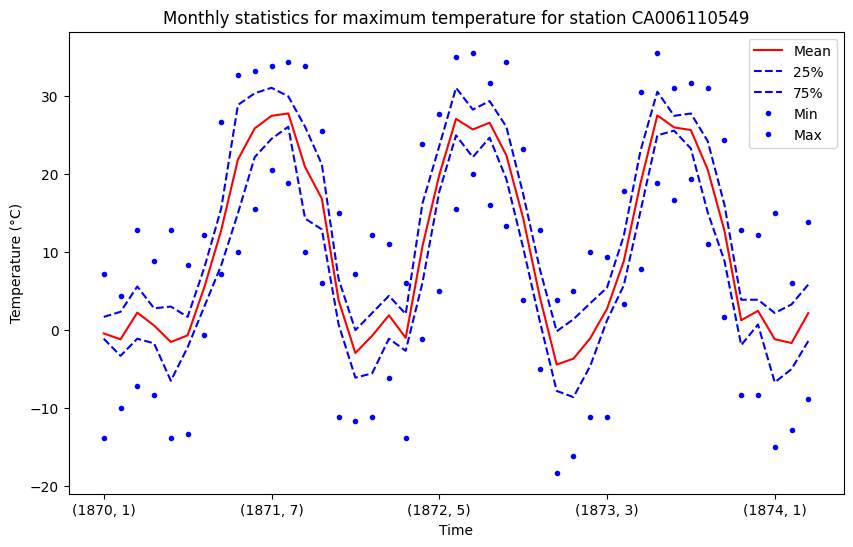

In [13]:
import matplotlib.pyplot as plt

# Select data for the specified station
df_station = df_weather_period[df_weather_period['station'] == 'CA006110549']

# Group data by year and month, and calculate statistics
df_station_grouped = df_station.groupby(['year', 'month'])['obs_value'].describe()

# Plot results
fig, ax = plt.subplots(figsize=(10,6))

# Mean
df_station_grouped['mean'].plot(ax=ax, color='red', label='Mean')

# 25% and 75% quantiles
df_station_grouped['25%'].plot(ax=ax, linestyle='dashed', color='blue', label='25%')
df_station_grouped['75%'].plot(ax=ax, linestyle='dashed', color='blue', label='75%')

# Min and Max
df_station_grouped['min'].plot(ax=ax, style='.', color='blue', label='Min')
df_station_grouped['max'].plot(ax=ax, style='.', color='blue', label='Max')

# Median (commented out)
# df_station_grouped['50%'].plot(ax=ax, label='Median')

plt.title('Monthly statistics for maximum temperature for station CA006110549')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


> **Ex. 3.3.3:** Use the station location data, which is located in this directory, to merge station locations onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt`.  Store the result in the variable `final_data`. 

> _Hint:_ The location data have the folllowing format, 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> *Hint*: The station information has fixed width format - does there exist a pandas reader for that?

In [15]:
# Load station data
df_stations = pd.read_fwf('ghcnd-stations.txt',
                          widths=[11, 9, 10, 7, 3, 30, 4, 4, 6],
                          names=['station', 'latitude', 'longitude', 'elevation', 
                                 'state', 'name', 'gsn_flag', 'hcn_crn_flag', 'wmo_id'],
                          dtype={'station': str})

# Merge station data with weather data
final_data = pd.merge(df_weather_period, df_stations, on='station', how='left')

# This script first reads the station location data using pd.read_fwf(). The widths parameter is set to a list of integers that define the widths of each field in the data. 
# The names parameter is set to a list of column names.

# The script then merges the station data with the weather data using the merge() function. The on parameter is set to 'station', which is the common column that the 
# dataframes will be merged on. The how parameter is set to 'left', which means that all the rows from df_weather_period and only the matching rows from df_stations will be kept.

# The merged data is stored in final_data.

final_data

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat,obs_value_cat_labeled,tmax_mean,tmax_median,latitude,longitude,elevation,state,name,gsn_flag,hcn_crn_flag,wmo_id
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875,"(28.3, 47.8]",hot,32.241176,31.9,-30.0917,145.9358,106.0,NaN,BOURKE POST OFFICE,NaN,NaN,NaN
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875,"(28.3, 47.8]",hot,32.241176,31.9,-30.0917,145.9358,106.0,NaN,BOURKE POST OFFICE,NaN,NaN,NaN
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875,"(28.3, 47.8]",hot,32.241176,31.9,-30.0917,145.9358,106.0,NaN,BOURKE POST OFFICE,NaN,NaN,NaN
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875,"(28.3, 47.8]",hot,32.241176,31.9,-30.0917,145.9358,106.0,NaN,BOURKE POST OFFICE,NaN,NaN,NaN
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875,"(28.3, 47.8]",hot,32.241176,31.9,-30.0917,145.9358,106.0,NaN,BOURKE POST OFFICE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131815,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7,40.7789,-73.9692,39.6,NY,NEW YORK CNTRL PK TWR,NaN,HC,N 7250
131816,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7,40.7789,-73.9692,39.6,NY,NEW YORK CNTRL PK TWR,NaN,HC,N 7250
131817,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7,40.7789,-73.9692,39.6,NY,NEW YORK CNTRL PK TWR,NaN,HC,N 7250
131818,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870,"(-1.1, 28.3]",medium,6.564516,6.7,40.7789,-73.9692,39.6,NY,NEW YORK CNTRL PK TWR,NaN,HC,N 7250


## Problems from Exercise Set 4:

> **Ex. 4.3.5:** This exercise consists of a set of small subelements: 
>
> 0. Show the first five rows of the titanic dataset. What information is in the dataset?
> 1. Use a barplot to show the probability of survival for men and women within each passenger class. 
> 2. Can you make a boxplot showing the same information (why/why not?). 
> 3. Show a boxplot for the fare-prices within each passenger class. 
> 4. Combine the two of the figures you created above into a two-panel figure and save it on your computer.

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


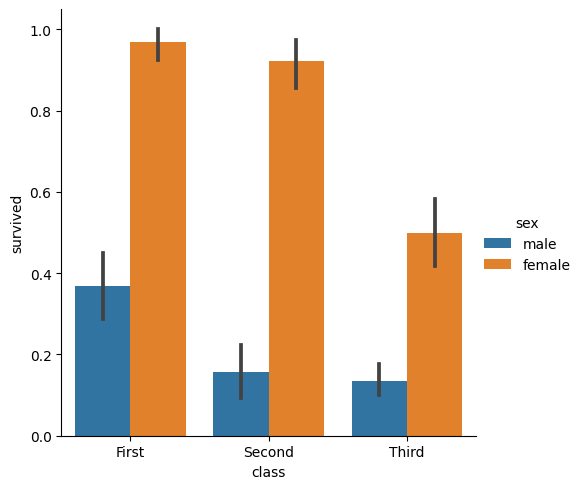

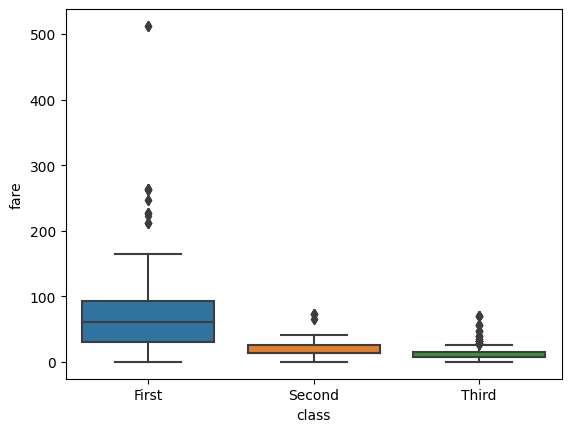

c:\Users\cille\PycharmProjects\pythonProject\HelloWorld\venv\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


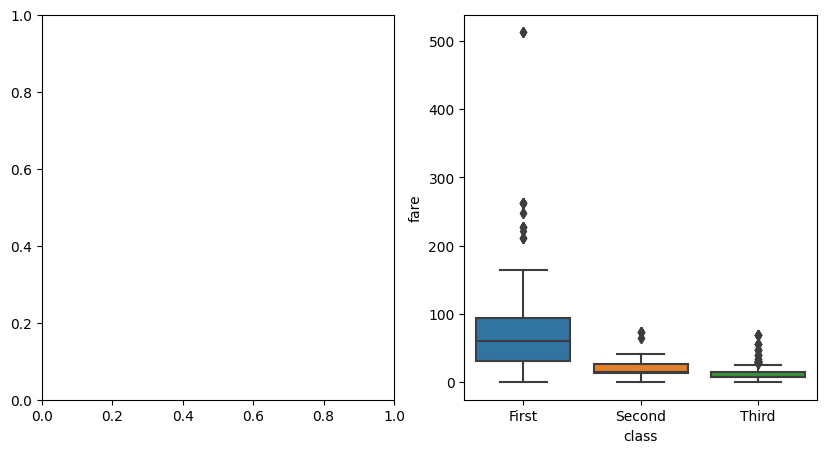

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df_titanic = sns.load_dataset('titanic')

# 0. Show the first five rows of the titanic dataset.
print(df_titanic.head())

# This will give you a view of the first 5 rows of the dataset. 
# The dataset contains various information about the passengers on the Titanic, including their class (class), sex (sex), age (age), fare (fare), and whether they survived (survived).

# 1. Use a barplot to show the probability of survival for men and women within each passenger class.
sns.catplot(x="class", y="survived", hue="sex", data=df_titanic, kind="bar")
plt.show()

# This will give you a bar plot where the x-axis is the passenger class, the y-axis is the survival rate, and different colors represent different sexes.

# 2. Can you make a boxplot showing the same information (why/why not?). 
# A boxplot may not be the best choice for this visualization, as boxplots are 
# better suited for visualizing statistical distributions (such as quartiles and outliers) for continuous variables, and survival is a binary variable (0 or 1).

# 3. Show a boxplot for the fare-prices within each passenger class.
sns.boxplot(x="class", y="fare", data=df_titanic)
plt.show()

# This will give you a box plot where the x-axis is the passenger class and the y-axis is the fare. It shows the distribution of fare prices within each passenger class.

# 4. Combine the two of the figures you created above into a two-panel figure and save it on your computer.
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.catplot(x="class", y="survived", hue="sex", data=df_titanic, kind="bar", ax=axs[0])
sns.boxplot(x="class", y="fare", data=df_titanic, ax=axs[1])

plt.tight_layout()
plt.savefig('titanic_plots.png')
plt.close()

# This will create a two-panel figure where the left panel is the bar plot and the right panel is the box plot. The figure is saved to your current directory as 'titanic_plots.png'. 
# Please note that the plt.close() command is used to prevent the plot from being displayed in the notebook.




> **Ex. 4.3.6:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels.
>
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:
> <img src="iris_pic.png" alt="Drawing" style="width: 200px;"/>
>
> _Hint:_ Use the `.regplot` method from seaborn. 

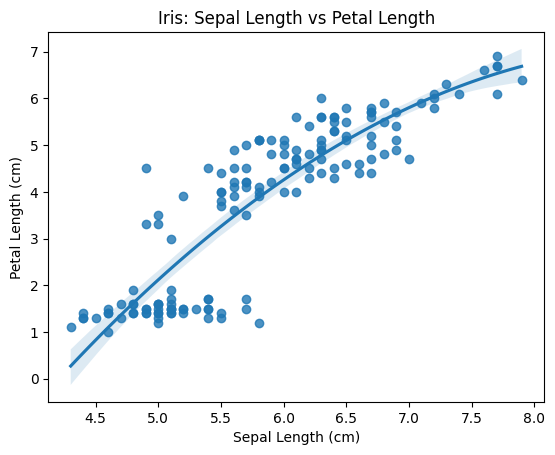

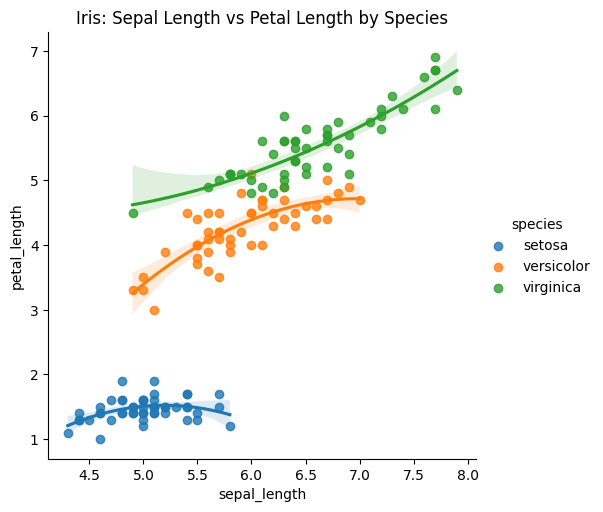

In [17]:
#First, load the iris dataset. Like the Titanic dataset, it also comes with the Seaborn library, and can be loaded with sns.load_dataset('iris').
#Here is how you can create the scatterplot with a second order polynomial fitted to the data:

# Load the iris dataset
df_iris = sns.load_dataset('iris')

# Create a scatterplot with a second order polynomial fitted to the data
sns.regplot(x="sepal_length", y="petal_length", data=df_iris, order=2)

# Add a title to the plot and rename the axis labels
plt.title('Iris: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

# While this scatterplot does illustrate the positive correlation between sepal length and petal length, it doesn't differentiate between the different species of iris flowers. 
# The species could be an important factor that affects these measurements, and displaying the species could provide more insights.

#Instead, we could use a lmplot to create a scatterplot with regression lines for each species. For example:


sns.lmplot(x="sepal_length", y="petal_length", hue="species", data=df_iris, order=2)
plt.title('Iris: Sepal Length vs Petal Length by Species')
plt.show()

#This plot would still show the positive correlation between sepal length and petal length, but it would also show how the relationship differs between the species.

> **Ex. 4.3.7:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements in the iris dataset. Change the color palette and remove the shading from the density plots. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

c:\Users\cille\PycharmProjects\pythonProject\HelloWorld\venv\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\cille\PycharmProjects\pythonProject\HelloWorld\venv\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\cille\PycharmProjects\pythonProject\HelloWorld\venv\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\cille\PycharmProjects\pythonProject\HelloWorld\venv\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning

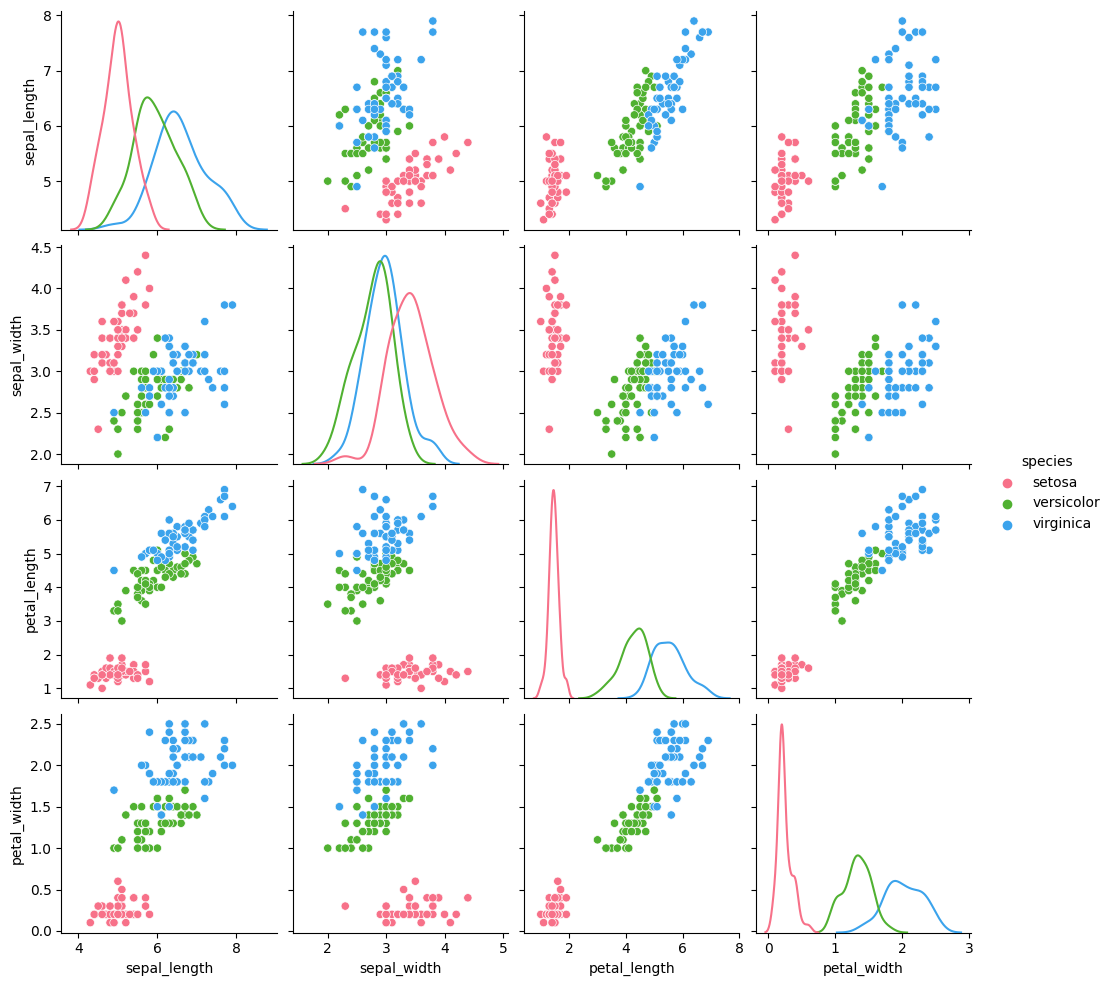

In [18]:
#First, let's draw the pairplot with hue:

sns.pairplot(df_iris, hue="species", palette="husl", diag_kind='kde', diag_kws=dict(shade=False))
plt.show()

#In this command, `diag_kind='kde'` specifies that the diagonal elements of the pairplot (which usually display histograms) should be kernel density estimates (KDEs), 
# and `diag_kws=dict(shade=False)` passes an additional argument to the function that plots the KDEs.

#The `diag_kws` argument is a way to pass additional keyword arguments to the function that is used to draw the diagonal subplots. In this case, we want to pass the `shade` 
# argument to the function that draws the KDE plots. `shade=False` means that the area under the KDE curve won't be shaded.

#In general, `**kwargs` is a way in Python to pass a variable-length list of keyword arguments to a function. The function that receives `**kwargs` can then access the 
# arguments as a dictionary. This is useful when you want a function to be flexible in the number of arguments it can accept, or when you want to pass arguments to another function.

## Problems from Exercise Set 6

> **Ex. 6.1.2.:** Use the `request` module to collect the first page of job postings and unpack the relevant `json` data into a `pandas` DataFrame.

In [1]:
import requests
import pandas as pd

# Brug den fundne URL
url = 'https://www.jobindex.dk/jobsoegning.json?q=psykologi&geoareaid=15182&address=&jobage=&mindate=&maxdate=&page='

# Send en GET-forespørgsel til URL'en
response = requests.get(url)

# Tjek om forespørgslen var succesfuld
if response.status_code == 200:
    # Hent JSON-data
    data = response.json()

    # Konverter data til pandas DataFrame
    # I mangel af en bedre forståelse af strukturen af dataene, vil jeg antage, at jobopslagene ligger under nøglen 'data'
    df = pd.DataFrame(data['data'])

    # Vis de første fem rækker
    print(df.head())
else:
    print("Request failed. Status code:", response.status_code)



KeyError: 'data'

In [24]:
assert sorted(df.columns) == ['Abroad', 'AnonymousEmployer', 'AssignmentStartDate', 'AutomatchType', 'Country', 
                              'DetailsUrl', 'EmploymentType', 'FormattedLastDateApplication', 'HasLocationValues', 
                              'HiringOrgCVR', 'HiringOrgName', 'ID', 'IsExternal', 'IsHotjob', 'JobAnnouncementType', 
                              'JobHeadline', 'JobLogUrl', 'JoblogWorkTime', 'LastDateApplication', 'Latitude', 'Location',
                              'Longitude', 'Municipality', 'Occupation', 'OccupationArea', 'OccupationGroup', 
                              'OrganisationId', 'PostalCode', 'PostalCodeName', 'PostingCreated', 'Presentation',
                              'Region', 'ShareUrl', 'Title', 'Url', 'UseWorkPlaceAddressForJoblog', 'UserLoggedIn',
                              'Weight', 'WorkHours', 'WorkPlaceAbroad', 'WorkPlaceAddress', 'WorkPlaceCity',
                              'WorkPlaceNotStatic', 'WorkPlaceOtherAddress', 'WorkPlacePostalCode', 'WorkplaceID']
assert len(df) == 20

AssertionError: 

> **Ex. 6.1.3.:** How many results do you find in total? Store this number as 'TotalResultCount' for later use.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Problems from Exercise Set 7

> **Ex. 7.2.1:** Here we practice locating the table node of interest using the `find` method build into BeautifoulSoup. But first we have to fetch the HTML using the `requests` module. Parse the tree using `BeautifulSoup`. Next, use the **>Inspector<** tool (*right click on the table < press inspect element*) in your browser to see how to locate the Eastern Conference table node - i.e. the *tag* name of the node, and maybe some defining *attributes*.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()